<a href="https://colab.research.google.com/github/Son0208/prac_class/blob/main/Building%20the%20Winning%20KBO%20Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building the Winning Team with KBO data

https://www.kaggle.com/rezameri/simple-eda-to-build-the-winning-team/notebook

In [ ]:
install.packages("Lahman")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("broom")
install.packages("dslabs")
install.packages("reshape2")
install.packages("lpSolve")

library(Lahman)
library(dplyr)
library(tidyverse)
library(broom)
library(dslabs)
library(reshape2)
library(lpSolve)

1. Data

Regular_Season_Batter.csv  
(https://dacon.io/competitions/official/62540/data/)

(https://drive.google.com/file/d/116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD/view?usp=sharing)

kbo_team_stat.csv

(http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2015&ye=2020&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Year&o2=AB&de=1&lr=1&tr=&cv=&ml=1&sn=30&si=&cn=AVG,,0,RBI,,0)

(https://drive.google.com/file/d/18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9/view?usp=sharing


In [14]:
system("gdown --id 116OV5ysXKG3dgJ9V79U_kISFy1-r8CUD")
bat <- read.csv("Regular_Season_Batter.csv",header=T,fileEncoding = "euc-kr")

system("gdown --id 18rEIWCdRoJS6_r8luZlvT2yN5Gzi3CQ9")
team <- read.csv("kbo_team_stat.csv",header=T,fileEncoding = "euc-kr")

In [ ]:
head(bat)

In [ ]:
head(team)

In [ ]:
str(data)

In [ ]:
str(team)

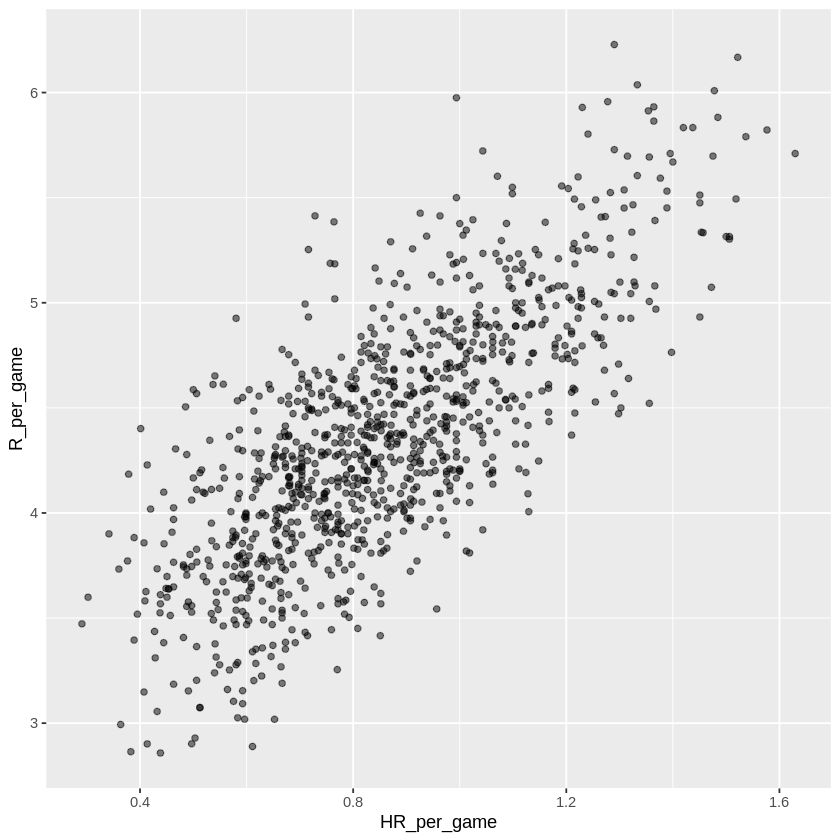

In [6]:
# scatterplot of the relationship between home runs and wins  
Teams %>% filter(yearID %in% 1961:2001) %>%
  mutate(HR_per_game = HR / G, R_per_game = R / G) %>%
  ggplot(aes(HR_per_game, R_per_game)) + 
  geom_point(alpha = 0.5)

In [ ]:
# regression line slope for home runs
get_slope <- function(x, y) cor(x, y) * sd(y) / sd(x)

hr_slope <- Teams %>% 
  filter(yearID %in% 1961:2001 ) %>% 
  mutate(HR_per_game = HR/G, R_per_game = R/G) %>% 
  summarize(slope = get_slope(HR_per_game, R_per_game))

hr_slope 

# scatterplot of the relationship between bases on balls and wins 
Teams %>% filter(yearID %in% 1961:2001) %>%
  mutate(BB_per_game = BB / G, R_per_game = R / G) %>%
  ggplot(aes(BB_per_game, R_per_game)) + 
  geom_point(alpha = 0.5)

# regression line slope for bases on balls
bb_slope <- Teams %>% 
  filter(yearID %in% 1961:2001 ) %>% 
  mutate(BB_per_game = BB/G, R_per_game = R/G) %>% 
  summarize(slope = get_slope(BB_per_game, R_per_game))

bb_slope

In [10]:
?Lahman